In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../BNB_nue data/nue_and_mu.csv', index_col=0)
df.head()
df = df.dropna()

In [4]:
variables = ['eps', 'pc2Var', 'nHits', 'RSS', 'RSS2', 'sliding']

In [5]:
df_cut = df.loc[(df['completeness']>0) & (df['purity']>0) & (df['nHits']>0)]
len(df_cut)


4575

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


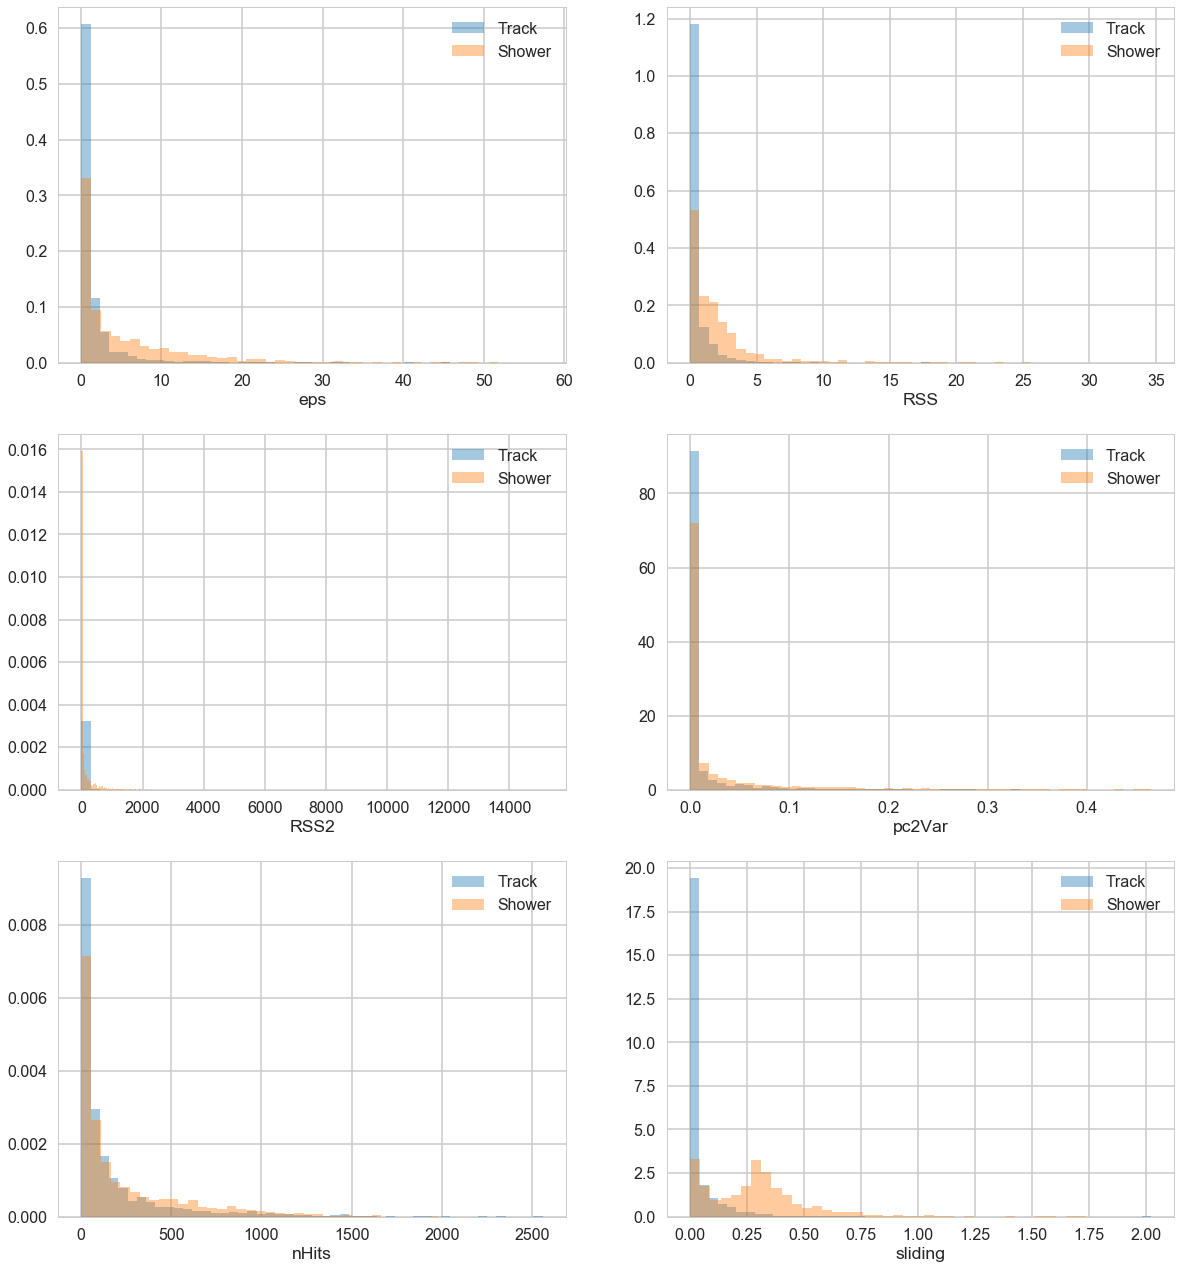

In [6]:
sns.set_style('whitegrid')
sns.set_context("poster")
length=3
width=2
fig, axarr = plt.subplots(length, width, figsize=(20,10))
plt.gcf().subplots_adjust(bottom=-0.8)
count=0
for i in range(len(variables)):
    sns.distplot(df_cut[df_cut.isTrueTrack == 1][variables[i]], label='Track', kde=False, norm_hist=True, ax=axarr[i%length][count%width])
    sns.distplot(df_cut[df_cut.isTrueTrack == 0][variables[i]], label = 'Shower', kde=False, norm_hist=True, ax=axarr[i%length][count%width])
    plt.legend()
    axarr[i%length][count%width].legend()
    count+=1
    plt.close()
    #plt.show()
    
fig

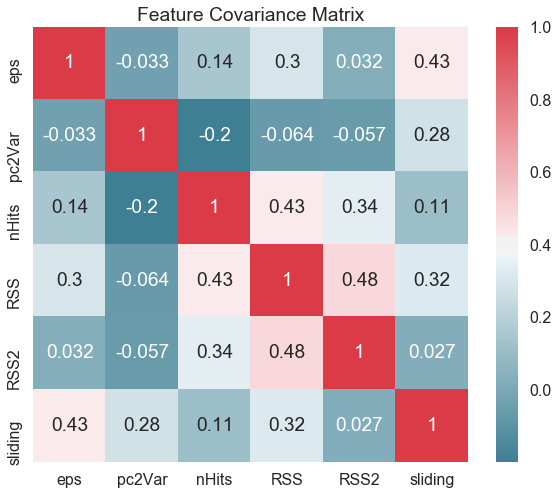

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_cut[variables].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = corr)
plt.title("Feature Covariance Matrix")
plt.show()

In [8]:
df.head()

,isTrueTrack,pdg,completeness,purity,x,z,eps,pc2Var,nHits,RSS,RSS2,sliding
0,1,2212,1.000000,0.909091,"[119.384, 119.3, 119.172, 119.087, 119.007, 11...","[846.25, 846.55, 846.85, 847.15, 847.45, 847.7...",0.2,0.000057,41,0.020997,0.007951,0.010279
1,1,2212,0.733333,1.000000,"[115.512, 115.676, 115.968, 116.284, 116.596, ...","[842.35, 842.65, 842.95, 843.25, 843.55, 843.8...",0.5,0.000663,13,0.032420,0.002150,0.016347
2,0,11,0.892892,0.998911,"[165.12, 165.08, 165.017, 164.967, 164.921, 16...","[640.75, 641.05, 641.35, 641.65, 641.95, 642.2...",4.9,0.000467,247,1.072781,47.833154,0.224833
3,1,2212,0.989362,0.965398,"[165.52, 165.513, 165.514, 165.499, 165.503, 1...","[638.35, 638.65, 638.95, 639.25, 639.55, 639.8...",0.7,0.000035,136,0.130221,0.216665,0.006108
4,1,2212,0.875000,0.875000,"[164.341, 164.365, 164.386, 164.427, 164.472, ...","[632.05, 632.35, 632.65, 632.95, 633.25, 633.5...",0.1,0.001649,21,0.028268,0.008956,0.008670


In [9]:
train_variables =['eps', 'pc2Var', 'nHits', 'RSS','RSS2', 'sliding']
X_train, X_test, y_train, y_test = train_test_split(df[train_variables], df['isTrueTrack'], test_size=0.5, random_state=42)

In [10]:
clf=DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, y_train )
y_pred = clf.predict(X_test)
prob = [clf.predict_proba(X_test)[i][1] for i in range(len(X_test))]
accuracy_score(y_test, y_pred)
#clf.feature_importances_


0.8531468531468531

In [11]:
X_test['prob']=prob
X_test['pred']=y_pred
X_test['isTrueTrack']=y_test

In [12]:
X_test.head()

,eps,pc2Var,nHits,RSS,RSS2,sliding,prob,pred,isTrueTrack
1644,5.1,0.000476,1193,6.855428,999.815025,0.246305,0.028090,0,0
3558,0.3,0.000074,9,0.007662,0.000186,0.005760,0.988834,1,1
3069,0.4,0.000019,80,0.066146,0.024678,0.017719,0.988834,1,1
3410,4.4,0.000301,498,4.394152,680.707863,0.260720,0.028090,0,0
2557,2.5,0.005650,80,2.372929,27.004544,0.193999,0.301075,0,1


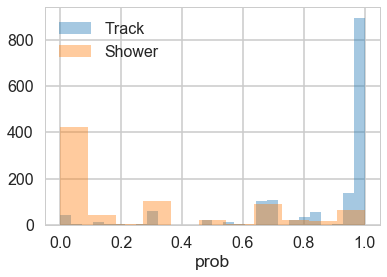

In [13]:
sns.distplot(X_test.loc[X_test['isTrueTrack']==1].prob,label='Track', kde=False)
sns.distplot(X_test.loc[X_test['isTrueTrack']==0].prob, label='Shower', kde=False)
plt.legend()
plt.show()

In [14]:
cut_value= np.arange(0,1,0.1)
accList = []
compList = []
for i in cut_value:
    index_pur = df.loc[X_test.index].loc[df['purity']>i].index
    #index_comp = df.loc[X_test.index].loc[df['completeness']>i].index
    acc = accuracy_score(X_test.loc[index_pur].isTrueTrack, X_test.loc[index_pur].pred)
    comp = len(index_pur)/len(X_test)
    accList.append(acc)
    compList.append(comp)


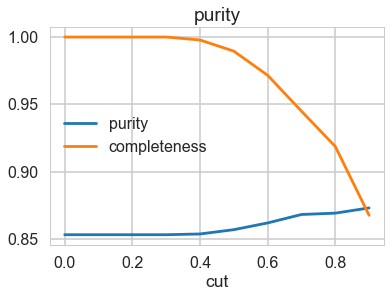

In [15]:
plt.figure()
plt.plot(cut_value, accList, label='purity')
plt.plot(cut_value, compList, label= 'completeness')
plt.legend()
plt.title('purity')
plt.xlabel('cut')
plt.show()

In [16]:
cut_value= np.arange(0,1,0.1)
accList = []
compList = []
for i in cut_value:
    index_pur = df.loc[X_test.index].loc[df['completeness']>i].index
    #index_comp = df.loc[X_test.index].loc[df['completeness']>i].index
    acc = accuracy_score(X_test.loc[index_pur].isTrueTrack, X_test.loc[index_pur].pred)
    comp = len(index_pur)/len(X_test)
    accList.append(acc)
    compList.append(comp)


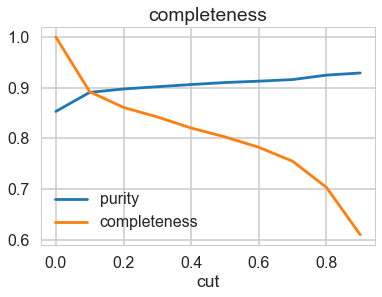

In [17]:
plt.figure()
plt.plot(cut_value, accList, label = 'purity')
plt.plot(cut_value, compList, label = 'completeness')
plt.legend()
plt.title('completeness')
plt.xlabel('cut')
plt.show()

In [18]:
cut_value= np.arange(0,500,10)
accList = []
compList = []
for i in cut_value:
    index_pur = df.loc[X_test.index].loc[df['nHits']>i].index
    #index_comp = df.loc[X_test.index].loc[df['completeness']>i].index
    acc = accuracy_score(X_test.loc[index_pur].isTrueTrack, X_test.loc[index_pur].pred)
    comp = len(index_pur)/len(X_test)
    accList.append(acc)
    compList.append(comp)


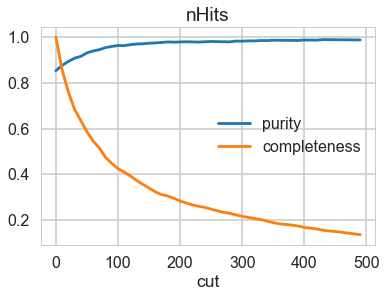

In [19]:
plt.figure()
plt.plot(cut_value, accList, label='purity')
plt.plot(cut_value, compList, label = 'completeness')
plt.legend()
plt.title('nHits')
plt.xlabel('cut')
plt.show()